In [ ]:
!pip install datasets
from google.colab import drive
drive.mount('/content/drive')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
Mounted at /content/drive


In [ ]:
import pandas as pd

splits = {'train': 'data/train-00000-of-00001.parquet', 'test': 'data/test-00000-of-00001.parquet'}
train_df = pd.read_parquet("hf://datasets/mediabiasgroup/BABE/" + splits["train"])
test_df = pd.read_parquet("hf://datasets/mediabiasgroup/BABE/" + splits["test"])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


https://github.com/Media-Bias-Group/Neural-Media-Bias-Detection-Using-Distant-Supervision-With-BABE


In [ ]:
train_df.head(10)

,text,news_link,label,outlet,topic,type,label_opinion,biased_words,uuid
0,NYPD Commissioner Dermot Shea on Monday expres...,http://feedproxy.google.com/~r/breitbart/~3/F5...,0,Breitbart,marriage-equality,None,Entirely factual,[],GtvFWZmmQmybyeMnb8Wbsr
1,School systems across the country are adopting...,https://thefederalist.com/2020/07/08/black-liv...,1,Federalist,islam,None,Expresses writer’s opinion,"['indoctrinating', 'Marxist', 'alarming']",mvoQPtabs6NZbby6LkLbms
2,"And then along came President Barry Obama, who...",http://feedproxy.google.com/~r/breitbart/~3/ks...,1,Breitbart,marriage-equality,None,Expresses writer’s opinion,"['what', 'the', 'hell']",RDWPbijx3n2aw6NiMHt7di
3,"The curfews, which have never before occurred ...",https://www.alternet.org/2020/06/we-just-got-a...,1,Alternet,elections-2020,left,Entirely factual,"['false', 'claims']",2uYKw5KpXasJWH65WCjSu4
4,"Rather than help be a part of the solution, Tr...",https://www.alternet.org/2020/06/trump-thought...,1,Alternet,elections-2020,left,Expresses writer’s opinion,['racist'],SRGvrzY9PkvtHESdts35Rw
5,The Times reported that Bill Gates had met in ...,https://www.reuters.com/article/uk-factcheck-b...,0,Reuters,#metoo,center,Entirely factual,[],A4cxdS37FXciRVQCWn2XEd
6,The success of the Trump administration’s Oper...,https://thefederalist.com/2020/12/18/corporate...,1,Federalist,vaccine,None,Expresses writer’s opinion,"['any', 'presidency']",5ViSgt3L5jx94nqG3ZgCpX
7,The Trump administration is proposing tariffs ...,None,0,Breitbart,international-politics-and-world-news,right,Entirely factual,[],GSrpqAY2pikLheBivKgnyF
8,Rep. Al Green (D-TX) at a hearing on Wednesday...,https://www.breitbart.com/politics/2019/09/18/...,1,Breitbart,white-nationalism,right,Somewhat factual but also opinionated,['hoax'],mgPeeKAZxQQpZNc86Hua5B
9,The British government will attempt to mitigat...,http://feedproxy.google.com/~r/breitbart/~3/EI...,0,Breitbart,taxes,right,Entirely factual,[],Ms7hRuxxvuTY9ACQhZwoKZ


In [ ]:
test_df.head(10)

,text,news_link,label,outlet,topic,type,label_opinion,biased_words,uuid
0,"As the Black Lives Matter movement grows, comp...",https://www.foxnews.com/us/juneteenth-calls-in...,0,Fox News,marriage-equality,None,Entirely factual,[],ayLcFCbNshSG5zjdXTQHGH
1,The case of Rahaf Mohammed al-Qunun drawn new ...,https://www.reuters.com/article/us-thailand-sa...,0,Reuters,gender,center,Entirely factual,[],4QADvLi4RqLNtzkM9rCmS3
2,The Post said the talks on payroll taxes were ...,https://www.reuters.com/article/us-usa-economy...,0,Reuters,taxes,center,Entirely factual,[],nAprfpSfXPNX3WvMFvADd7
3,Nearly 78 percent of Americans report experien...,https://www.thedailybeast.com/climate-disaster...,0,The Daily Beast,environment,None,None,None,yQsHy6FPz5cq92SE22Rwhj
4,Colin P. Clarke has been teaching a course on ...,https://eu.usatoday.com/story/news/nation/2020...,0,USA Today,white-nationalism,center,Entirely factual,[],h4qCzqXRwgh5JyVBykCJFv
5,"Even while claiming to reopen in New York, Cuo...",https://thefederalist.com/2020/07/21/in-the-fa...,1,Federalist,vaccine,None,Expresses writer’s opinion,"['claiming', 'unnecessary', 'to']",3keqQARGfXp2whNEZKAqUW
6,"In Heller, the Supreme Court struck down a ban...",https://www.alternet.org/2020/04/the-supreme-c...,0,Alternet,gun control,left,Entirely factual,[],eGBxPDFQVVgQSNZVx8Pft2
7,During a nationally-televised press briefing P...,https://www.alternet.org/2020/06/one-out-of-3-...,0,Alternet,coronavirus,left,Entirely factual,[],siqNVyZBV39PowaGJbwgCz
8,Polls show the transgender ideology is deeply ...,https://www.breitbart.com/politics/2019/02/21/...,1,Breitbart,gender,right,No agreement,[],qzBh3LaKzvFKtSHBZYRvhW
9,We don’t need to embrace full-on socialism com...,https://www.alternet.org/2019/01/alexandria-oc...,1,Alternet,middle-class,left,Expresses writer’s opinion,['swift'],qp7uJeqgHwKScGajeeiHbP


In [ ]:
train_df.shape

(3121, 9)

In [ ]:
test_df.shape

(1000, 9)

In [ ]:
# Calculate null values, data types, and % of null values for each column
null_values = train_df.isnull().sum()
data_types = train_df.dtypes
null_percentage = round((null_values / len(train_df)) * 100,1)

column_info = pd.DataFrame({
    'Null Values': null_values,
    'Null Percentage (%)': null_percentage,
    'Data Type': data_types
})

print("Null values, null percentage, and data types for each column:")
print(column_info)


Null values, null percentage, and data types for each column:
               Null Values  Null Percentage (%) Data Type
text                     0                  0.0    object
news_link               22                  0.7    object
label                    0                  0.0     int32
outlet                   0                  0.0    object
topic                    0                  0.0    object
type                  1095                 35.1    object
label_opinion          341                 10.9    object
biased_words           341                 10.9    object
uuid                     0                  0.0    object


In [ ]:
## what are the biased words when the label is 0?
train_df[train_df['label'] == 0]['biased_words']

,biased_words
0,[]
5,[]
7,[]
9,[]
11,[]
...,...
3111,[]
3112,['gobbling']
3114,[]
3117,[]


In [ ]:
##why are there biased words if the label is unbiased?? -- read data dictionary link to github above
train_df[train_df['label'] == 0]['biased_words'].value_counts()

,count
biased_words,
[],1087
['claiming'],9
['claim'],4
['claims'],3
['allegedly'],3
...,...
['thousands'],1
['nervous'],1
['complained'],1


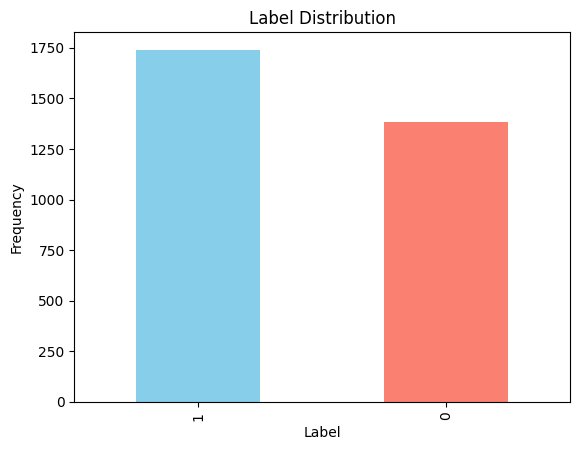

In [ ]:
import matplotlib.pyplot as plt

# Count label distribution
label_counts = train_df['label'].value_counts()
label_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.show()

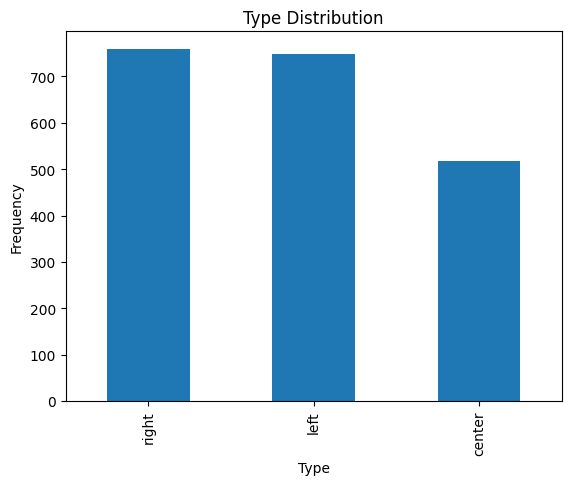

In [ ]:
type_counts = train_df['type'].value_counts()
type_counts.plot(kind='bar')
plt.title("Type Distribution")
plt.xlabel("Type")
plt.ylabel("Frequency")
plt.show()

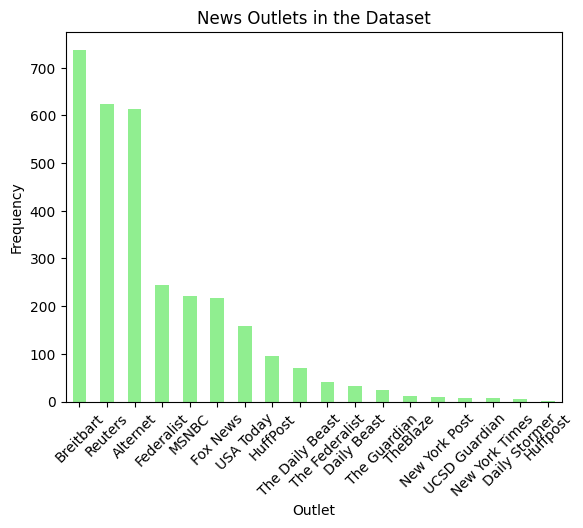

In [ ]:
outlet_counts = train_df['outlet'].value_counts()
outlet_counts.plot(kind='bar', color='lightgreen')
plt.title("News Outlets in the Dataset")
plt.xlabel("Outlet")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


In [ ]:
train_df['topic'].value_counts()

,count
topic,
marriage-equality,279
black lives matter,222
vaccine,221
taxes,184
islam,176
universal health care,176
gun control,157
white-nationalism,133
environment,131


In [ ]:
from collections import Counter

biased_words_list = []

for entry in train_df['biased_words']:
    if isinstance(entry, list) and entry:
        biased_words_list.extend(entry)
    elif isinstance(entry, str) and entry:
        biased_words_list.extend(entry.strip("[]").replace("'", "").split(", "))

biased_word_counts = Counter(biased_words_list)
top_biased_words = dict(biased_word_counts.most_common(20))
print("Top 20 Biased Words and Counts:")
for word, count in top_biased_words.items():
    print(f"{word}: {count}")

Top 20 Biased Words and Counts:
: 1370
claiming: 30
illegal: 23
claim: 22
the: 21
aliens: 21
claimed: 21
claims: 20
of: 19
radical: 17
out: 13
propaganda: 12
leftist: 12
racist: 11
lies: 11
slammed: 10
war: 10
to: 10
mob: 9
up: 9


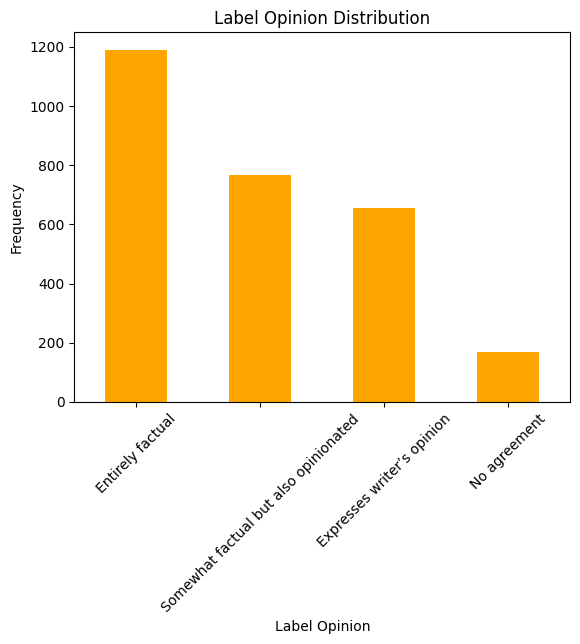

In [ ]:
# label_opinion distribution
opinion_counts = train_df['label_opinion'].value_counts()
opinion_counts.plot(kind='bar', color='orange')
plt.title("Label Opinion Distribution")
plt.xlabel("Label Opinion")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

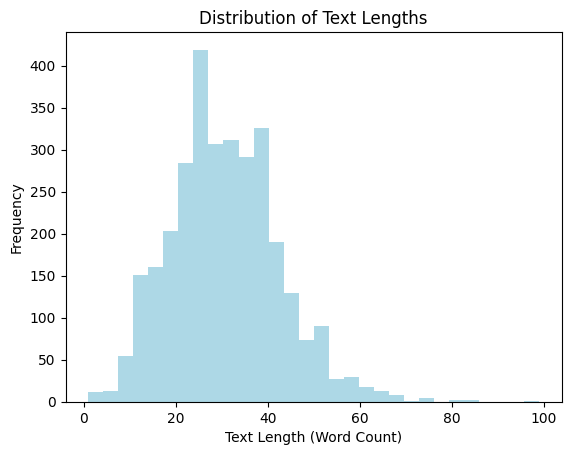

In [ ]:
train_df['text_length'] = train_df['text'].apply(lambda x: len(x.split()))
train_df['text_length'].plot(kind='hist', bins=30, color='lightblue')
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length (Word Count)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
test_df['type'].value_counts()

,count
type,
left,240
right,232
center,174


In [ ]:
!pip install transformers torch scikit-learn

In [ ]:
from transformers import RobertaTokenizer
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

def tokenize_data(data):
    return tokenizer(
        data['text'].tolist(),
        padding=True,
        truncation=True,
        max_length=512,
        return_tensors="pt"
    )

train_encodings = tokenize_data(train_df)
test_encodings = tokenize_data(test_df)


In [ ]:
import torch

label_mapping = {"right": 0, "left": 1, "center": 2}
train_df = train_df.dropna(subset=['type'])
test_df = test_df.dropna(subset=['type'])


train_df['type'] = train_df['type'].map(label_mapping).astype(int)
test_df['type'] = test_df['type'].map(label_mapping).astype(int)


train_encodings = tokenize_data(train_df)
test_encodings = tokenize_data(test_df)

train_labels = torch.tensor(train_df['type'].values, dtype=torch.long)
test_labels = torch.tensor(test_df['type'].values, dtype=torch.long)

print("Train input_ids shape after re-tokenizing:", train_encodings['input_ids'].shape)
print("Train labels shape after re-tokenizing:", train_labels.shape)

print("Test input_ids shape after re-tokenizing:", test_encodings['input_ids'].shape)
print("Test labels shape after re-tokenizing:", test_labels.shape)






<ipython-input-20-ad81aa8ef529>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['type'] = train_df['type'].map(label_mapping).astype(int)
<ipython-input-20-ad81aa8ef529>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['type'] = test_df['type'].map(label_mapping).astype(int)


Train input_ids shape after re-tokenizing: torch.Size([2026, 123])
Train labels shape after re-tokenizing: torch.Size([2026])
Test input_ids shape after re-tokenizing: torch.Size([646, 122])
Test labels shape after re-tokenizing: torch.Size([646])


In [ ]:
from transformers import RobertaForSequenceClassification

model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=3)


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from torch.utils.data import DataLoader, TensorDataset


train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], train_labels)
test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], test_labels)


train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)


In [ ]:
from transformers import AdamW
from tqdm import tqdm
optimizer = AdamW(model.parameters(), lr=1e-5)

# Training loop
# model.train()
# epochs = 3  # Adjust as needed
# for epoch in range(epochs):
#     print(f"Epoch {epoch + 1}/{epochs}")
#     for batch in tqdm(train_loader):
#         input_ids, attention_mask, labels = batch
#         labels = labels.to(dtype=torch.long)
#         optimizer.zero_grad()
#         outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
#         loss = outputs.loss
#         loss.backward()
#         optimizer.step()
#     print(f"Loss after epoch {epoch + 1}: {loss.item()}")



/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# model.eval()
# all_preds, all_labels = [], []

# with torch.no_grad():
#     for batch in test_loader:
#         input_ids, attention_mask, labels = batch
#         outputs = model(input_ids=input_ids, attention_mask=attention_mask)
#         logits = outputs.logits
#         preds = torch.argmax(logits, dim=1).flatten()

#         all_preds.extend(preds.cpu().numpy())
#         all_labels.extend(labels.cpu().numpy())


# accuracy = accuracy_score(all_labels, all_preds)
# report = classification_report(all_labels, all_preds, target_names=['right', 'left', 'center'])

# print(f"Accuracy: {accuracy}")
# print("Classification Report:")
# print(report)


In [ ]:
!pip install optuna

In [ ]:
import optuna
from sklearn.metrics import accuracy_score
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
def objective(trial):
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-6, 1e-4)
    batch_size = trial.suggest_int("batch_size", 16, 64, step=16)
    dropout_rate = trial.suggest_uniform("dropout_rate", 0.1, 0.5)
    model = RobertaForSequenceClassification.from_pretrained(
        "roberta-base",
        num_labels=3,
        hidden_dropout_prob=dropout_rate
    ).to(device)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)

    optimizer = AdamW(model.parameters(), lr=learning_rate)

    model.train()
    for epoch in range(2):
        for batch in tqdm(train_loader):
            input_ids, attention_mask, labels = [b.to(device) for b in batch]
            optimizer.zero_grad()
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()


    model.eval()
    preds, true_labels = [], []
    with torch.no_grad():
        for batch in test_loader:
            input_ids, attention_mask, labels = [b.to(device) for b in batch]
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds.extend(torch.argmax(logits, axis=1).cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    val_accuracy = accuracy_score(true_labels, preds)
    return 1 - val_accuracy


study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)


print("Best hyperparameters:", study.best_params)


[I 2024-12-07 15:26:53,717] A new study created in memory with name: no-name-4958b349-a424-4b53-bca0-1c2f81b7b5be


Using device: cuda


<ipython-input-26-4145f720a2f6>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-6, 1e-4)
<ipython-input-26-4145f720a2f6>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform("dropout_rate", 0.1, 0.5)
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages

Best hyperparameters: {'learning_rate': 7.84370831967302e-06, 'batch_size': 16, 'dropout_rate': 0.13385521461321137}


## Fine Tuning Model Based on Optuna Results

In [ ]:
from transformers import AdamW
from tqdm import tqdm
import torch
from sklearn.metrics import accuracy_score

learning_rate = 7.839322031704545e-06  # From Optuna best trial
batch_size = 64  # From Optuna best trial
dropout_rate = 0.2386835006219092  # From Optuna best trial

optimizer = AdamW(model.parameters(), lr=learning_rate)


if torch.cuda.is_available():
    print("GPU is available!")
    print(torch.cuda.get_device_name(0))
else:
    print("GPU not available, using CPU.")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
model.to(device)


epochs = 3
model.train()

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    epoch_loss = 0
    all_labels = []
    all_preds = []
    for batch in tqdm(train_loader):
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = (
            input_ids.to(device),
            attention_mask.to(device),
            labels.to(device, dtype=torch.long),
        )

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()


        preds = torch.argmax(logits, dim=-1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())


    avg_epoch_loss = epoch_loss / len(train_loader)
    accuracy = accuracy_score(all_labels, all_preds)
    print(f"Average loss after epoch {epoch + 1}: {avg_epoch_loss}")
    print(f"Accuracy after epoch {epoch + 1}: {accuracy:.4f}")



model.save_pretrained("/content/drive/MyDrive/fine_tuned_model")
tokenizer.save_pretrained("/content/drive/MyDrive/fine_tuned_model")
print("Model saved successfully!")


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


GPU is available!
Tesla T4
Using device: cuda
Epoch 1/3


100%|██████████| 127/127 [00:41<00:00,  3.07it/s]


Average loss after epoch 1: 1.0314200360943953
Accuracy after epoch 1: 0.4245
Epoch 2/3


100%|██████████| 127/127 [00:41<00:00,  3.07it/s]


Average loss after epoch 2: 0.8146621655291459
Accuracy after epoch 2: 0.6180
Epoch 3/3


100%|██████████| 127/127 [00:41<00:00,  3.07it/s]


Average loss after epoch 3: 0.6296501727554742
Accuracy after epoch 3: 0.7315
Model saved successfully!


In [ ]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).flatten()

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = accuracy_score(all_labels, all_preds)
report = classification_report(all_labels, all_preds, target_names=['right', 'left', 'center'])

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.7120743034055728
Classification Report:
              precision    recall  f1-score   support

       right       0.69      0.75      0.72       232
        left       0.75      0.63      0.68       240
      center       0.70      0.78      0.74       174

    accuracy                           0.71       646
   macro avg       0.71      0.72      0.71       646
weighted avg       0.72      0.71      0.71       646

